# House Prices: Advanced Regression Techniques
## Exploratory Data Analysis



## Import libraries

In [1]:

import numpy as np
from scipy import stats
import pandas as pd
import pandas.api.types as ptypes
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Import datasets

In [2]:

df_train = pd.read_csv("train.csv",low_memory=False)
df_test = pd .read_csv("test.csv",low_memory=False)

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_test["SalePrice"] = 0

In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,0


In [7]:

print("df_train shape: ", df_train.shape, "df_test shape: ", df_test.shape)

df_train shape:  (1460, 81) df_test shape:  (1459, 81)


In [8]:
df_train["origin"] = "train"
df_test["origin"] = "test"
dataframe = df_train.append(df_test)

In [9]:
dataframe.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,origin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train


In [10]:
dataframe.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
#  function to display more rows and more columns
def display_all(dataframe):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(dataframe)

In [12]:
#value count for categorical values
# Print the value counts for categorical columns
for col in dataframe.columns:
    if dataframe[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(dataframe[col].value_counts())


Column Name: MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

Column Name: Street
Pave    2907
Grvl      12
Name: Street, dtype: int64

Column Name: Alley
Grvl    120
Pave     78
Name: Alley, dtype: int64

Column Name: LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

Column Name: LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

Column Name: Utilities
AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

Column Name: LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

Column Name: LandSlope
Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

Column Name: Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Cra

In [13]:
#target variable(SalePrice) statistics
dataframe.loc[dataframe["origin"] == "train", "SalePrice"].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [14]:
dataframe.loc[dataframe["origin"] == "train", "SalePrice"].median()

163000.0

/home/maslinux/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matpl

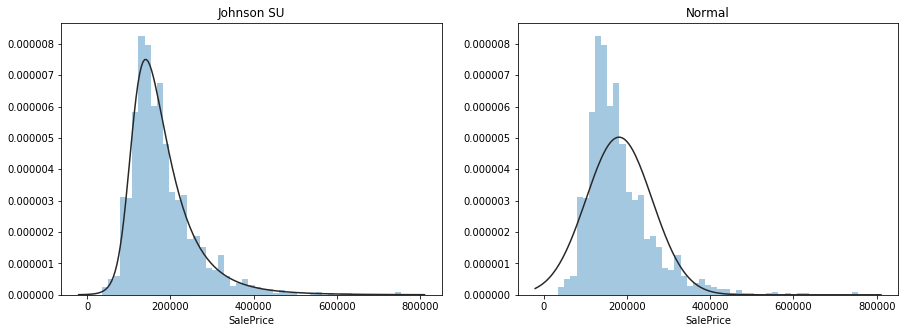

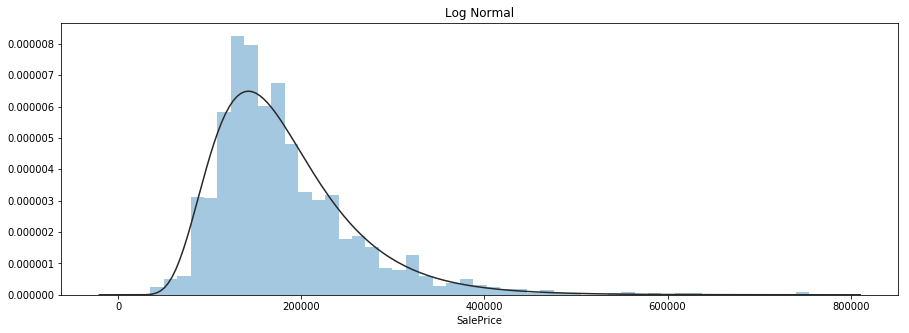

In [15]:
# distribution of SalePrice  
plt.rcParams["figure.figsize"] = (15,5)
plt.subplot(121); plt.title("Johnson SU")
sns.distplot(dataframe.loc[dataframe["origin"] == "train", "SalePrice"],kde=False,fit=stats.johnsonsu)
plt.subplot(122); plt.title("Normal")
sns.distplot(dataframe.loc[dataframe["origin"] == "train", "SalePrice"], kde=False, fit=stats.norm)
plt.figure(3); plt.title("Log Normal")
sns.distplot(dataframe.loc[dataframe["origin"] == "train", "SalePrice"], kde=False, fit=stats.lognorm)
plt.show()


In [16]:
#it's skewed right and some outliers are above 500,000
# Reason as to why the median is lower than the mean

/home/maslinux/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


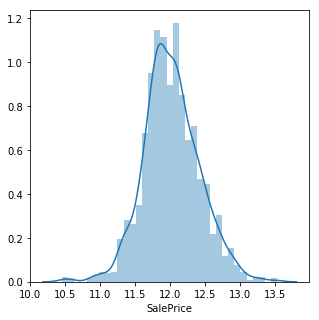

In [17]:
plt.rcParams["figure.figsize"] = (5, 5)
sns.distplot(np.log(dataframe.loc[dataframe["origin"] == "train", "SalePrice"]))
plt.show()

In [18]:
# Extract quantitative variables
quantitative = [i for i in dataframe.columns if dataframe.dtypes[i] != 'object']

In [19]:
quantitative.remove('Id')

In [20]:
quantitative.remove('SalePrice')

In [21]:
# Extract qualitative variables.
#qualitative = [i for i in dataframe.columns if dataframe.dtypes[i] == 'object']
#qualitative.remove('origin')

## Investigating numeric data

In [22]:
display_all(dataframe.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [23]:
# putting data into a format suitable for plotting
melted = pd.melt(dataframe, value_vars=quantitative)
#melted

/home/maslinux/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matpl

/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/maslinux/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  

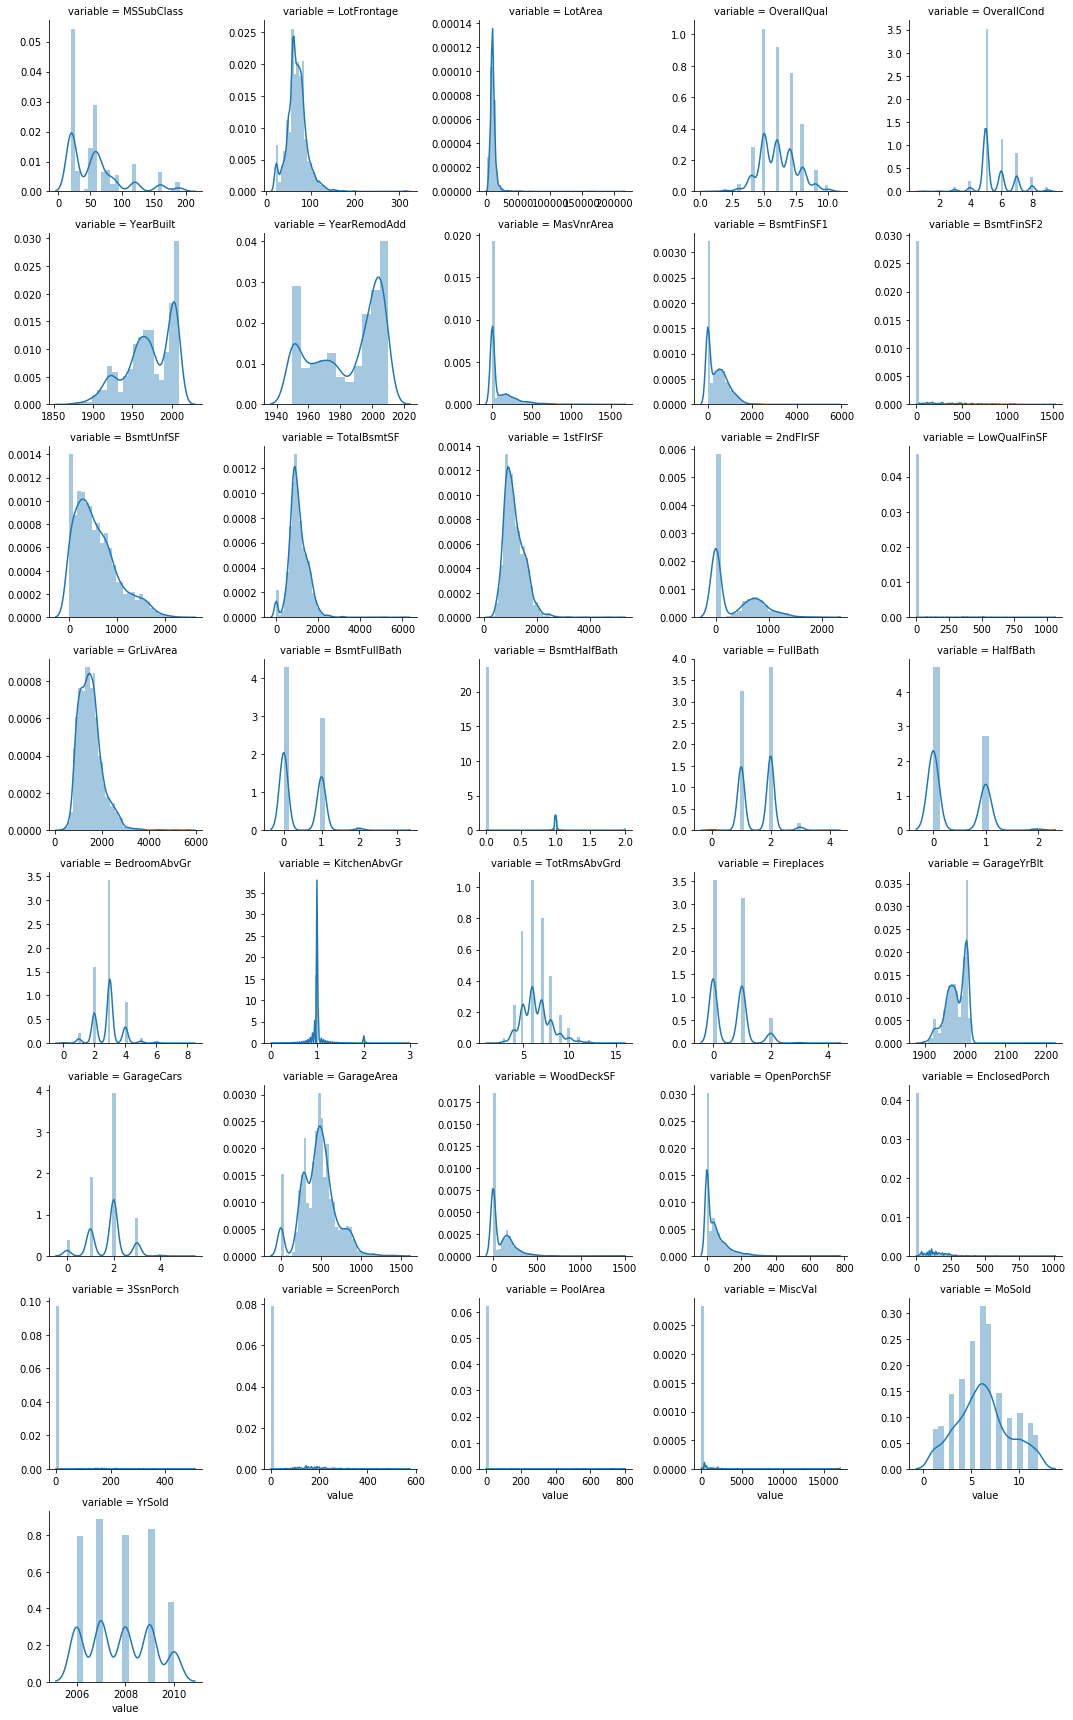

In [24]:
# And then we can have a look at the distributions:
m2 = sns.FacetGrid(melted, col='variable', col_wrap=5, sharex=False, sharey=False)
m2 = m2.map(sns.distplot, 'value')
plt.show()


In [25]:
# we can identify our numeric field of interest from  the distributions above.

num_of_interest = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'
]

In [26]:
df_train = dataframe[dataframe["origin"] == "train"].copy()
df_train.drop(columns="origin", inplace = True)

/home/maslinux/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


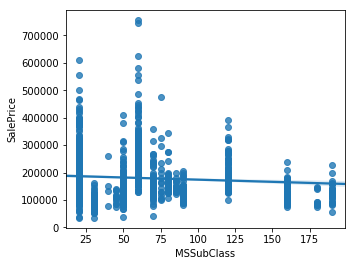

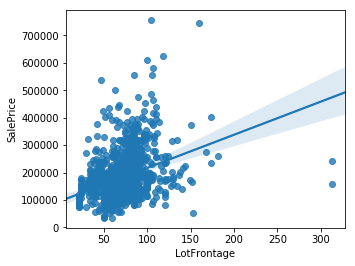

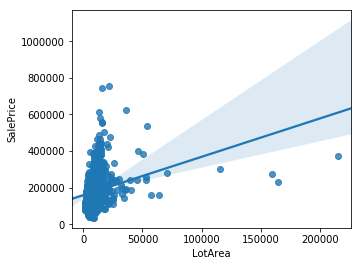

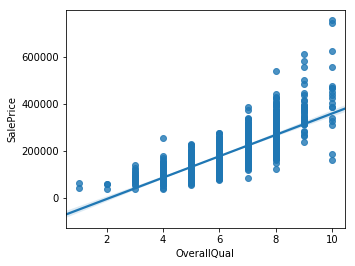

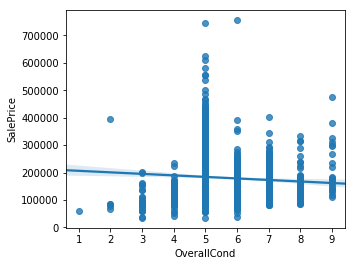

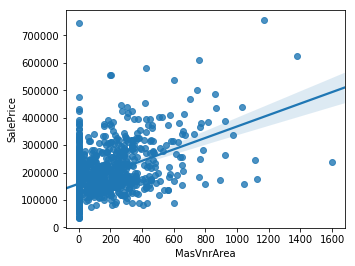

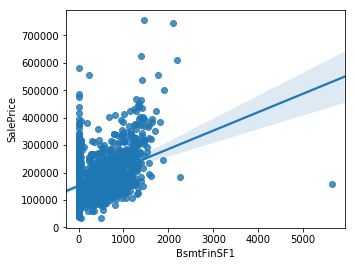

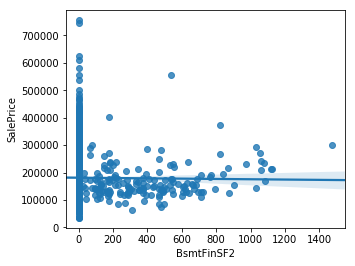

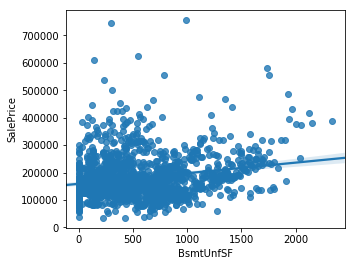

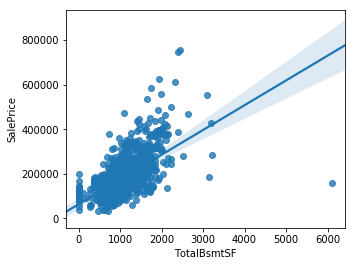

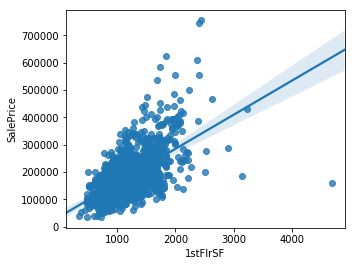

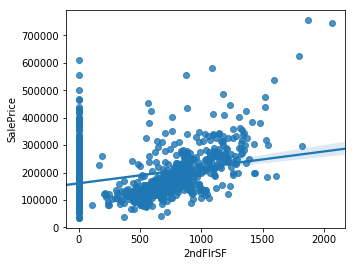

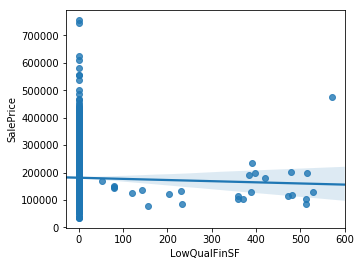

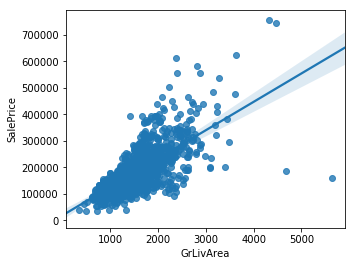

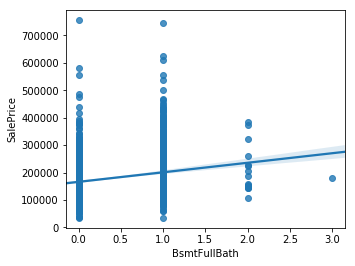

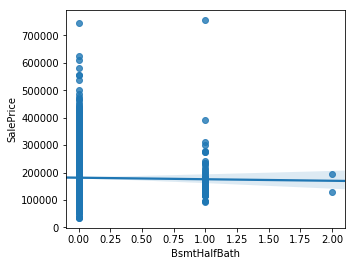

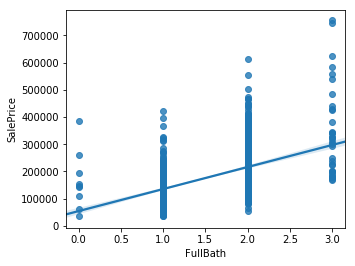

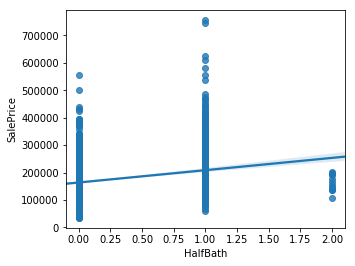

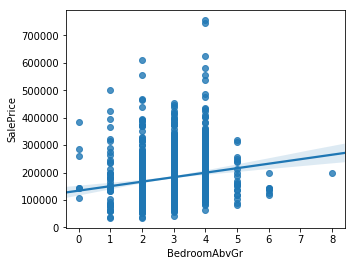

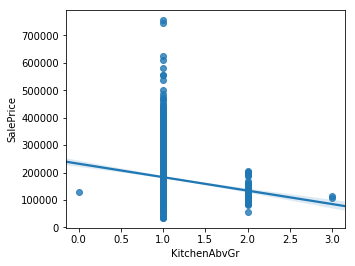

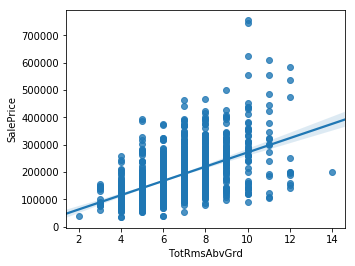

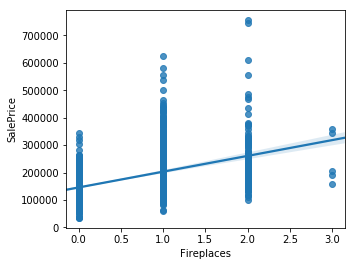

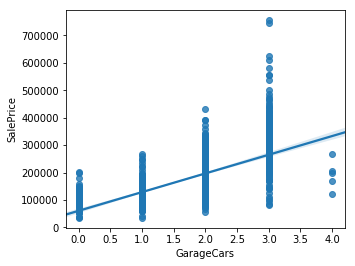

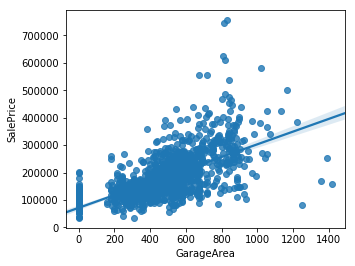

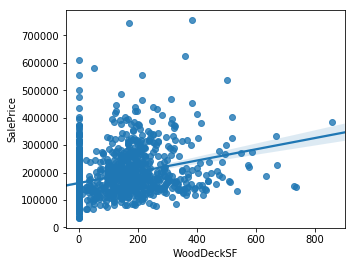

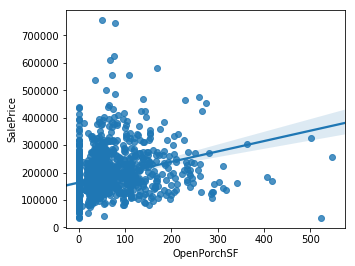

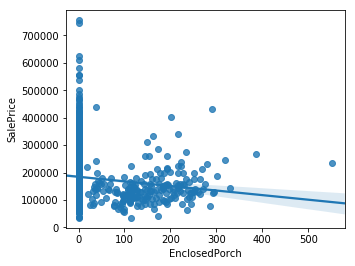

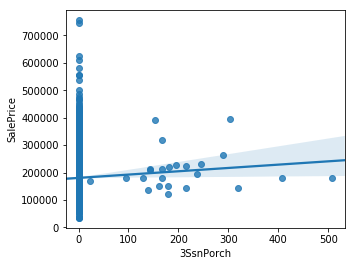

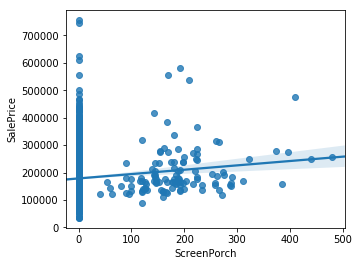

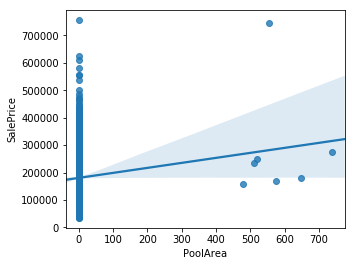

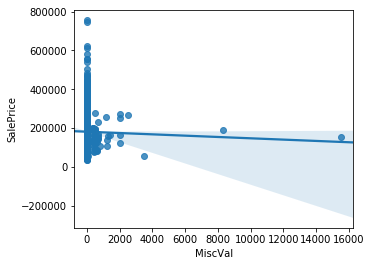

ValueError: shapes (100,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

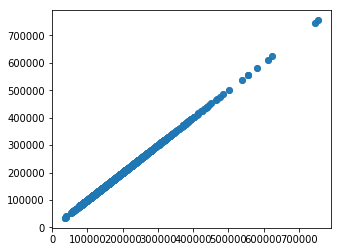

In [27]:
plt.rcParams['figure.figsize'] = (5,4)
for i in range(len(num_of_interest)):
    var = num_of_interest[i]
    data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
    sns.regplot(data = data, x=var, y="SalePrice")
    plt.show()

/home/maslinux/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


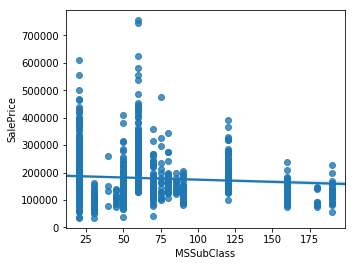

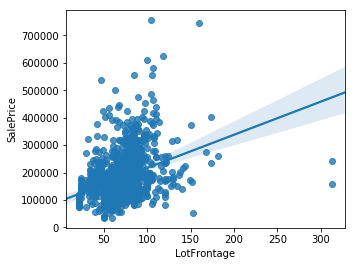

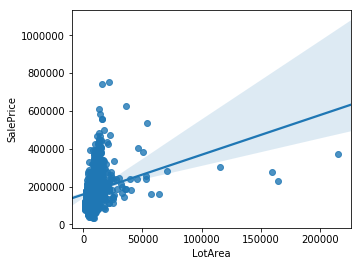

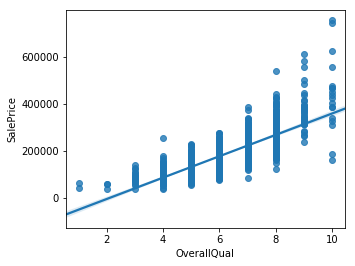

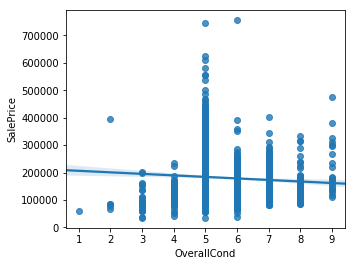

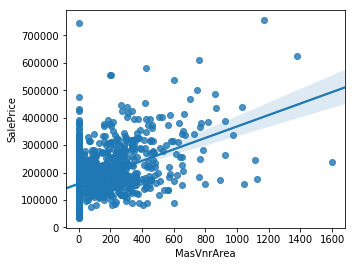

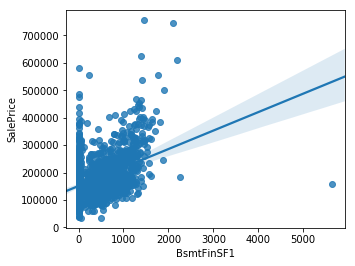

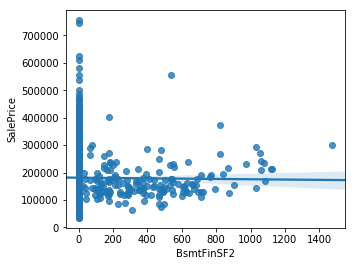

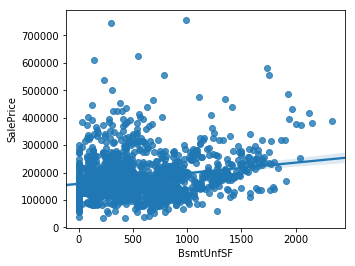

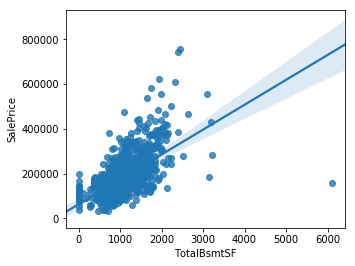

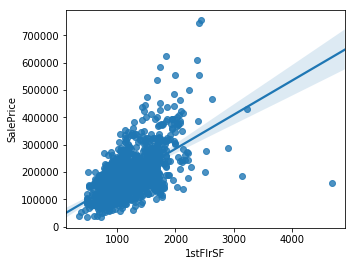

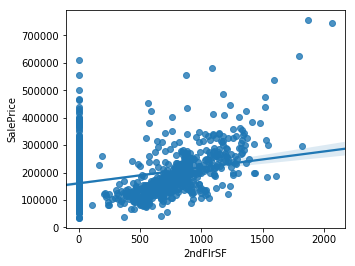

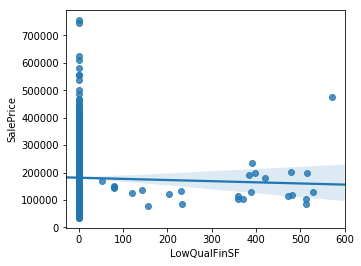

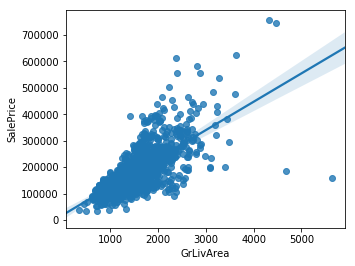

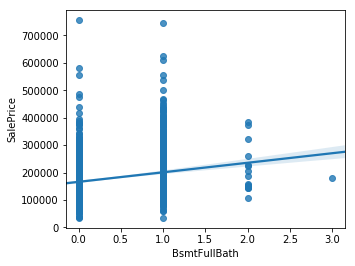

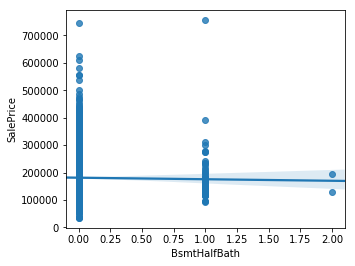

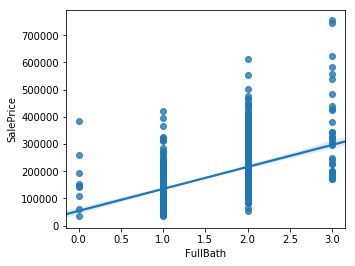

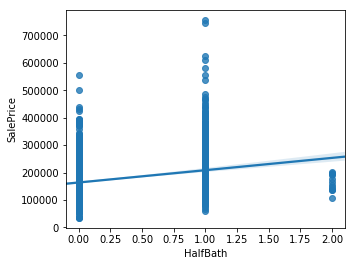

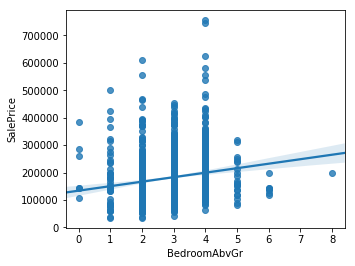

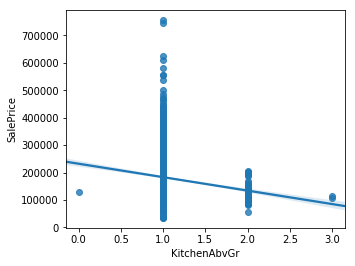

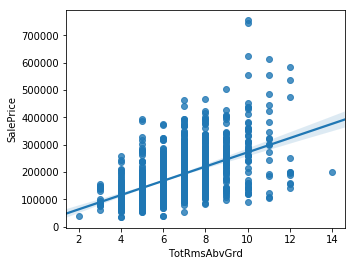

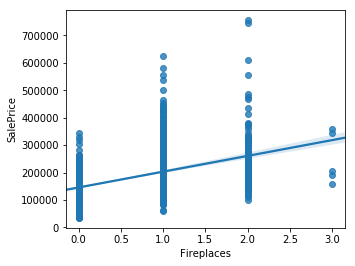

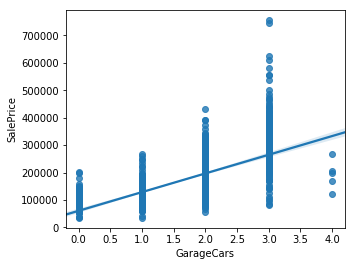

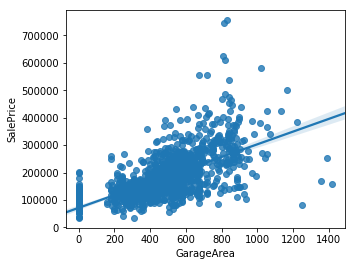

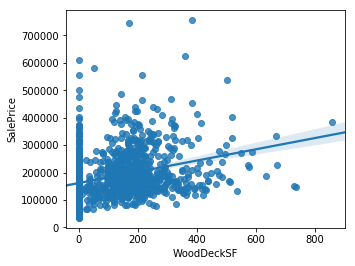

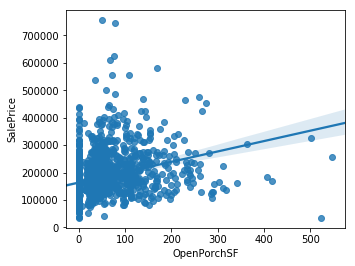

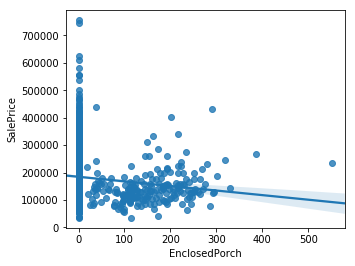

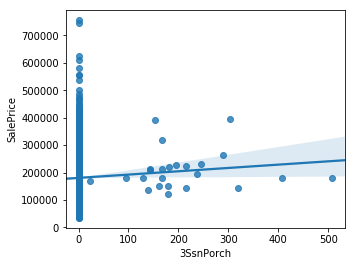

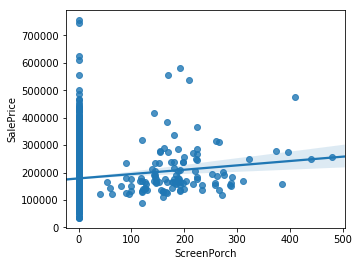

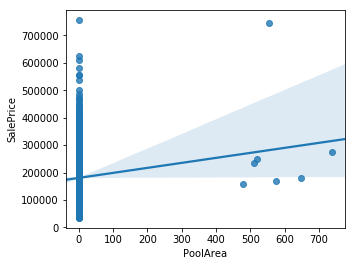

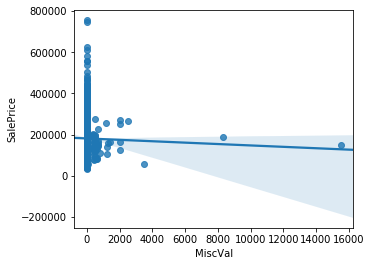

ValueError: shapes (100,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

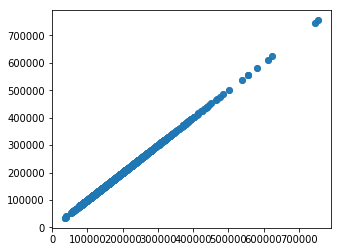

In [28]:
# sns.regplot() helps in visualizing linear relationships between variables availbale for 
#prediction and the target variable.
plt.rcParams['figure.figsize'] = (5,4)
for i in range(len(num_of_interest)):
    var = num_of_interest[i]
    data = pd.concat([df_train["SalePrice"], df_train[var]], axis=1)
    sns.regplot(data = data, x=var, y="SalePrice")
    plt.show()


In [ ]:
#  list of numeric values strongly correlated with sale price
df_num_corr = df_train[num_of_interest].corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
strong_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are a total of {} strongly correlated values with SalePrice:\n{}".format(len(strong_features_list), strong_features_list))

In [ ]:
# The distribution plots of strongly correlated features
features_to_analyse = [x for x in num_of_interest if x in strong_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 16))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df_train[features_to_analyse], ax=ax)

In [ ]:
 
    cat_of_interest = [
    "MSSubClass", 
    "MSZoning", 
    "Street", 
    "Alley", 
    "LotShape", 
    "LandContour", 
    "Utilities", 
    "LotConfig", 
    "LandSlope", 
    "Neighborhood", 
    "Condition1", 
    "Condition2", 
    "BldgType", 
    "HouseStyle", 
    "OverallQual", 
    "OverallCond", 
    "RoofStyle", 
    "RoofMatl", 
    "Exterior1st", 
    "Exterior2nd", 
    "MasVnrType", 
    "ExterQual", 
    "ExterCond", 
    "Foundation", 
    "BsmtQual", 
    "BsmtCond", 
    "BsmtExposure", 
    "BsmtFinType1", 
    "BsmtFinType2", 
    "Heating", 
    "HeatingQC", 
    "CentralAir", 
    "Electrical", 
    "BsmtFullBath", 
    "BsmtHalfBath", 
    "FullBath", 
    "HalfBath", 
    "BedroomAbvGr", 
    "KitchenAbvGr", 
    "KitchenQual", 
    "TotRmsAbvGrd", 
    "Functional", 
    "Fireplaces", 
    "FireplaceQu", 
    "GarageType", 
    "GarageFinish", 
    "GarageCars", 
    "GarageQual", 
    "GarageCond", 
    "PavedDrive", 
    "PoolQC", 
    "Fence", 
    "MiscFeature", 
    "MoSold", 
    "SaleType", 
    "SaleCondition"
]

### Investigating categorical data

In [ ]:
# Let's take a look at the univariate analysis of categorical variables - the key stats:
display_all(dataframe[cat_of_interest].describe(include=['object', 'bool']).transpose())

In [ ]:
# analysis of categorical data using boxplot or violinplot.
#  good for checking outliers in a particular category.  

plt.rcParams['figure.figsize'] = (7, 6)
chart = sns.boxplot(x = df_train["RoofMatl"], y=df_train["SalePrice"])
for item in chart.get_xticklabels():
        item.set_rotation(45)
plt.show()

In [ ]:
#strip plots for all our categorical variables
plt.rcParams['figure.figsize'] = (5, 4)
for i in range(len(cat_of_interest)):
    chart = sns.stripplot(x = df_train[cat_of_interest[i]], y=df_train["SalePrice"])
    for item in chart.get_xticklabels():
        item.set_rotation(45)
    plt.show()
# An obvious stand-out correlation is between OverallQual and SalePrice. With each additional point for quality
# the graph climbs up!

In [29]:

dataframe["Foundation"].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [30]:
dataframe["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

### Investigating correlation pairs

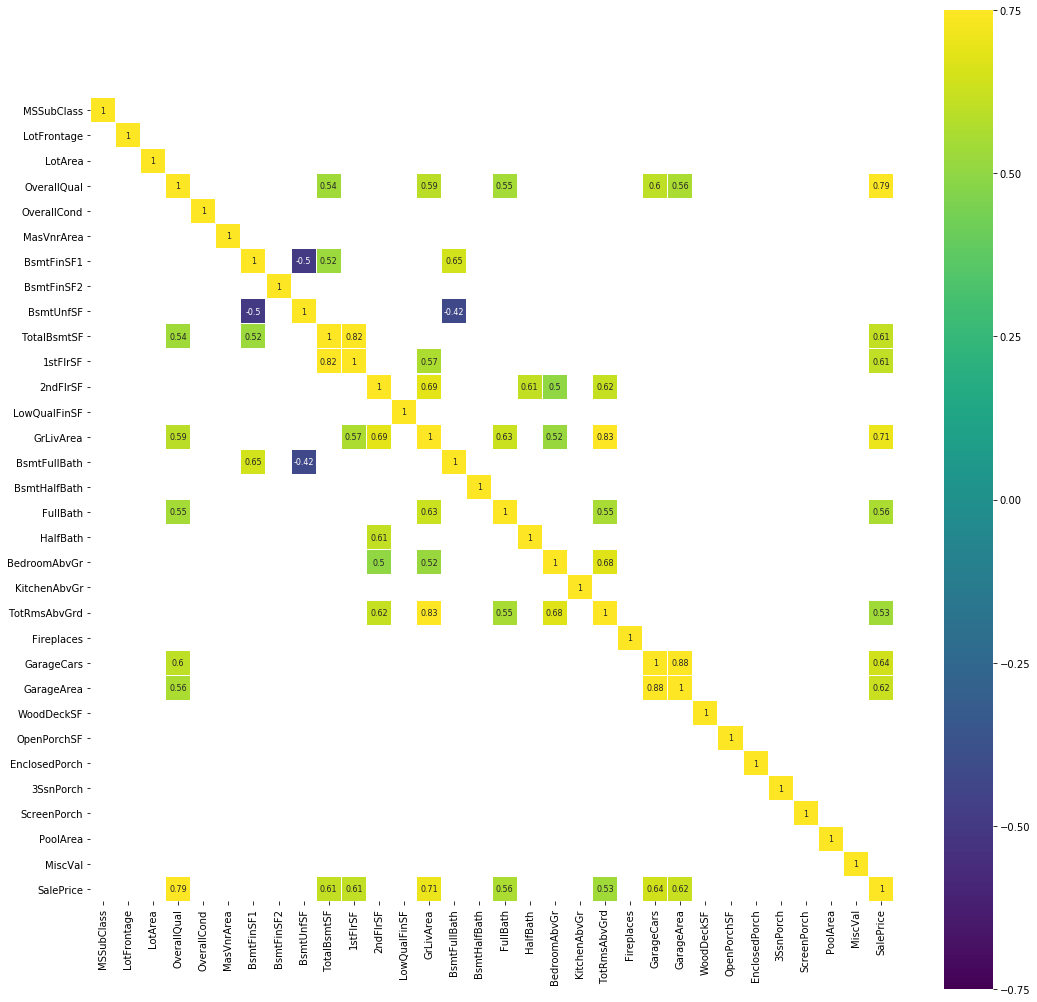

In [31]:
corr_matrix = df_train[num_of_interest].corr()
plt.subplots(figsize=(18, 18))

sns.heatmap(corr_matrix[(corr_matrix >= 0.5) | (corr_matrix <= -0.4)], 
            cmap='viridis', vmax=0.75, vmin=-0.75, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [32]:
corr_rank = pd.DataFrame(corr_matrix["SalePrice"].sort_values(ascending = False)).reset_index()
corr_rank.style.background_gradient(cmap = "viridis", subset = "SalePrice")

,index,SalePrice
0,SalePrice,1
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,MasVnrArea,0.477493


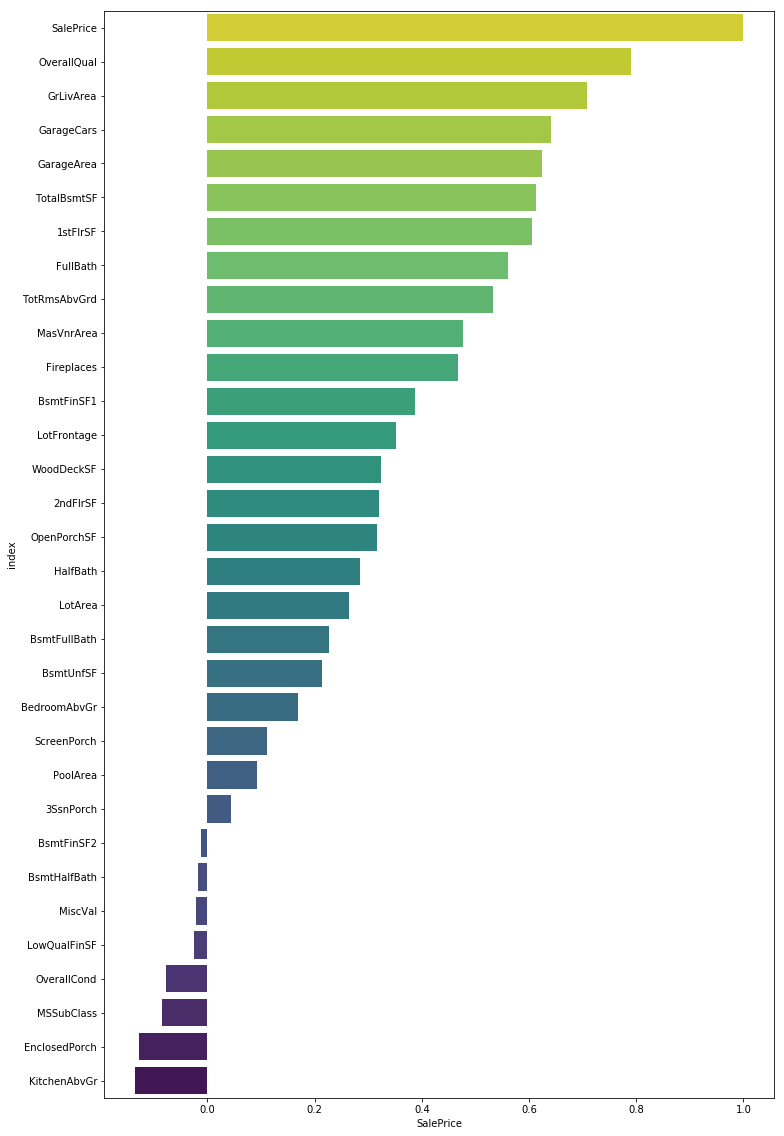

In [33]:
plt.subplots(figsize=(12, 20))
sns.barplot(x = "SalePrice", y = "index", data = corr_rank, palette = "viridis_r")
plt.show()

In [34]:
### null values
def na_totals(dataframe):
    na_totals = dataframe.isnull().sum().sort_values(ascending=False)
    return na_totals[na_totals > 0]
na_totals(dataframe)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageYrBlt      159
GarageQual       159
GarageCond       159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Utilities          2
Functional         2
BsmtHalfBath       2
BsmtUnfSF          1
GarageCars         1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
GarageArea         1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
Electrical         1
dtype: int64

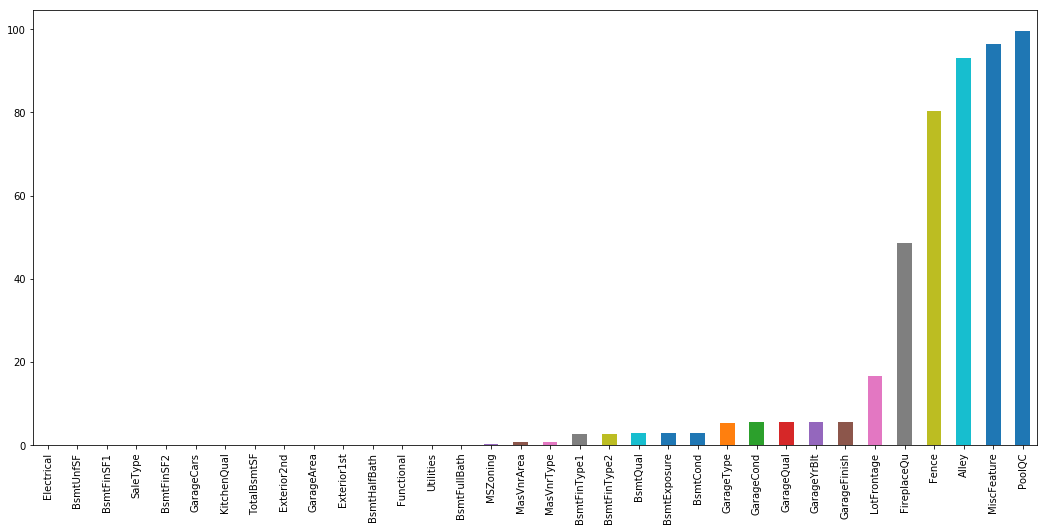

In [35]:
# Let's have a look visually at the % of missing values where applicable
plt.figure(figsize=(18,8))
missing_values = na_totals(dataframe)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
ms=missing_values/dataframe.shape[0]*100
ms.plot(kind='bar')
plt.show()